In [1]:
import re
def normalize_text(text):

    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    re.sub(' +', ' ', text)
    text=text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')
    #normalize some utf8 encoding
    text = text.replace("\x9d",'').replace("\x8c",'')
    text = text.replace("\xa0",'')
    text = text.replace("\x9d\x92", '').replace("\x9a\xaa\xf0\x9f\x94\xb5", '').replace("\xf0\x9f\x91\x8d\x87\xba\xf0\x9f\x87\xb8", '').replace("\x9f",'').replace("\x91\x8d",'')
    text = text.replace("\xf0\x9f\x87\xba\xf0\x9f\x87\xb8",'').replace("\xf0",'').replace('\xf0x9f','').replace("\x9f\x91\x8d",'').replace("\x87\xba\x87\xb8",'')
    text = text.replace("\xe2\x80\x94",'').replace("\x9d\xa4",'').replace("\x96\x91",'').replace("\xe1\x91\xac\xc9\x8c\xce\x90\xc8\xbb\xef\xbb\x89\xd4\xbc\xef\xbb\x89\xc5\xa0\xc5\xa0\xc2\xb8",'')
    text = text.replace("\xe2\x80\x99s", "").replace("\xe2\x80\x98", '').replace("\xe2\x80\x99", '').replace("\xe2\x80\x9c", "").replace("\xe2\x80\x9d", "")
    text = text.replace("\xe2\x82\xac", "").replace("\xc2\xa3", "").replace("\xc2\xa0", "").replace("\xc2\xab", "").replace("\xf0\x9f\x94\xb4", "").replace("\xf0\x9f\x87\xba\xf0\x9f\x87\xb8\xf0\x9f", "")
    text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    
    text=re.sub(r'\.+', ".", text)
    text=re.sub(r'\.\.+', ' ', text).replace('.', '')
    # Replace multiple dots with space
    text = re.sub('\.\.+', ' ', text) 
    # Remove single dots
    text = re.sub('\.', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\.{1}', '', text)
    
    return text

In [2]:
import pickle

In [3]:
f=open('train_output.pkl','rb')

In [4]:
f1=pickle.load(f)

In [5]:
f1=f1[['description_unmasked']]


In [6]:
len(f1)

4609233

In [7]:
f1=f1.drop_duplicates(subset=['description_unmasked'], keep='first')

In [8]:
f1=f1[:10000]

In [9]:
sentences=f1["description_unmasked"].tolist()

In [10]:
normalized_sentences=[]
for sentence in sentences:
    norm_sent=normalize_text(sentence)
    normalized_sentences.append(norm_sent)

In [11]:
import collections
# sentences to words and count
words=" ".join(normalized_sentences).split() 
count= collections.Counter(words).most_common() 
print ("Word count", count[:5])

Word count [('eleven', 6557), ('purchase', 3894), ('pos', 3197), ('card', 1987), ('hour', 1900)]


In [12]:
# Build dictionaries
unique_words =  [i[0] for i in count]
dic = {w: i for i, w in enumerate(unique_words)} #dic, word -> id cats:0 dogs:1 ......
voc_size = len(dic)

In [13]:
voc_size

5682

In [14]:
# Make indexed word data
data = [dic[word] for word in words] #count rank for every word in words
print('Sample data', data[:10], words[:10])

Sample data [1765, 2524, 629, 7, 2525, 2526, 380, 14, 36, 452] ['party', 'supplies', 'murrieta', 'ca', 'italian', 'restau', 'hampton', 'va', 'city', 'college']


In [15]:
# Let's make a training data for window size 1 for simplicity

cbow_pairs = []
for i in range(1, len(data)-1) :
    cbow_pairs.append([[data[i-1], data[i+1]], data[i]]);
    
print('Context pairs rank ids', cbow_pairs[:5])
print()

cbow_pairs_words = []
for i in range(1, len(words)-1) :
    cbow_pairs_words.append([[words[i-1], words[i+1]], words[i]]);
print('Context pairs words', cbow_pairs_words[:5])

Context pairs rank ids [[[1765, 629], 2524], [[2524, 7], 629], [[629, 2525], 7], [[7, 2526], 2525], [[2525, 380], 2526]]

Context pairs words [[['party', 'murrieta'], 'supplies'], [['supplies', 'ca'], 'murrieta'], [['murrieta', 'italian'], 'ca'], [['ca', 'restau'], 'italian'], [['italian', 'hampton'], 'restau']]


In [16]:
# Let's make skip-gram pairs
# (quick, the), (quick, brown), (brown, quick), (brown, fox), ...
skip_gram_pairs=[]

for c in cbow_pairs:
    skip_gram_pairs.append([c[1],c[0][0]])
    skip_gram_pairs.append([c[1],c[0][1]])
print('skip-gram pairs', skip_gram_pairs[:5])
print()
skip_gram_pairs_words=[]
for c in cbow_pairs_words:
    skip_gram_pairs_words.append([c[1],c[0][0]])
    skip_gram_pairs_words.append([c[1],c[0][1]])
print('skip-gram pairs words', skip_gram_pairs_words[:5])

skip-gram pairs [[2524, 1765], [2524, 629], [629, 2524], [629, 7], [7, 629]]

skip-gram pairs words [['supplies', 'party'], ['supplies', 'murrieta'], ['murrieta', 'supplies'], ['murrieta', 'ca'], ['ca', 'murrieta']]


In [17]:
import numpy as np
def get_batch(size):
    assert size<len(skip_gram_pairs)
    X=[]
    Y=[]
    rdm = np.random.choice(range(len(skip_gram_pairs)),size,replace=False)
    
    for r in rdm:
        X.append(skip_gram_pairs[r][0])
        Y.append([skip_gram_pairs[r][1]])
    return X , Y

# generate_batch test
print ('Batches (x, y)', get_batch(3))

Batches (x, y) ([137, 23, 193], [[909], [1214], [7]])


In [23]:

#tensor flow code#tensor  
import tensorflow as tf

batch_size = 20
embedding_size = 2
num_sampled = 15    # Number of negative examples to sample.

X= tf.placeholder(tf.int32,shape=[batch_size]) #inputs
Y= tf.placeholder(tf.int32,shape=[batch_size,1]) #labels

with tf.device("/cpu:0"):
      # Look up embeddings for inputs.
    embeddings = tf.Variable(tf.random_uniform([voc_size,embedding_size],-1.0,1.0))
    embed = tf.nn.embedding_lookup(embeddings, X) # lookup table
    
# Construct the variables for the NCE loss
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size],-1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# Compute the average NCE loss for the batch.
# This does the magic:
#   tf.nn.nce_loss(weights, biases, inputs, labels, num_sampled, num_classes ...)
# It automatically draws negative samples when we evaluate the loss.
loss = tf.reduce_mean(tf.nn.nce_loss(nce_weights, nce_biases, Y, embed, num_sampled, voc_size))
# Use the adam optimizer
optimizer = tf.train.AdamOptimizer(1e-1).minimize(loss)

In [24]:
epochs=10000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        
        batch_inputs, batch_labels = get_batch(batch_size)
        _,loss_val=sess.run([optimizer,loss],feed_dict = {X : batch_inputs, Y : batch_labels })
        
        if epoch % 1000 == 0:
            print("Loss at ", epoch, loss_val) # Report the loss
            print (embeddings.eval()[1,:])
    # Final embeddings are ready for you to use. Need to normalize for practical use
    trained_embeddings = embeddings.eval()
    

import matplotlib.pyplot as plt
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = unique_words[:50] # Show top 10 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    #plt.savefig("word2vec.png")
    plt.show()

Loss at  0 59.00052
[-0.29593968 -0.5073452 ]
Loss at  1000 43.650623
[1.4923182 2.0503147]
Loss at  2000 26.590204
[0.9791955 2.1130624]
Loss at  3000 13.872299
[0.79795444 2.2051272 ]
Loss at  4000 5.881475
[1.1348664 1.7739465]
Loss at  5000 12.115429
[0.5079076 1.5456091]
Loss at  6000 4.0763254
[0.8476295 1.9632509]
Loss at  7000 4.9857244
[0.8299895 1.3306594]
Loss at  8000 5.0355897
[1.6036227  0.90686613]
Loss at  9000 5.578733
[1.4824831 0.7658331]


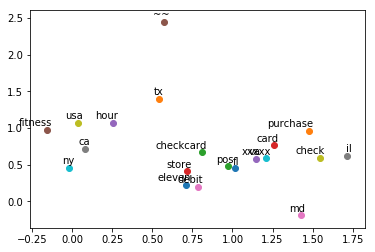

In [26]:
import matplotlib.pyplot as plt
# Show word2vec if dim is 2
if trained_embeddings.shape[1] == 2:
    labels = unique_words[:20] # Show top 10 words
    for i, label in enumerate(labels):
        x, y = trained_embeddings[i,:]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2),
            textcoords='offset points', ha='right', va='bottom')
    plt.savefig("word2vec.png")
    plt.show()

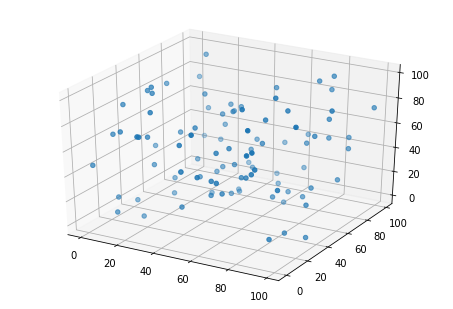

In [38]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = list(range(0, 100))
sequence_containing_y_vals = list(range(0, 100))
sequence_containing_z_vals = list(range(0, 100))

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.savefig("word2vec.png")
pyplot.show()

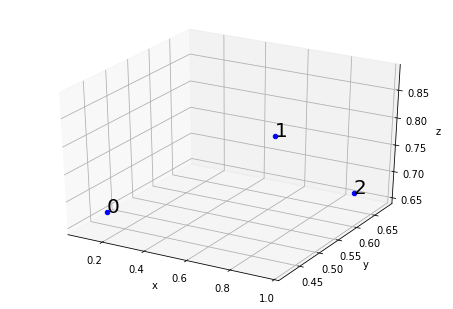

In [41]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure


m=rand(3,3) # m is an array of (x,y,z) coordinate triplets

fig = figure()
ax = Axes3D(fig)


for i in range(len(m)): #plot each point + it's index as text above
 ax.scatter(m[i,0],m[i,1],m[i,2],color='b') 
 ax.text(m[i,0],m[i,1],m[i,2],  '%s' % (str(i)), size=20, zorder=1,  
 color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()